<a href="https://colab.research.google.com/github/roesta07/Survival-Models-in-Businesses/blob/main/Survival_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip uninstall matplotlib

Uninstalling matplotlib-3.4.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.4.2-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.4.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.4.2


In [ ]:
!pip install matplotlib

  Using cached https://files.pythonhosted.org/packages/24/33/5568d443ba438d95d4db635dd69958056f087e57e1026bee56f959d53f9d/matplotlib-3.4.2-cp37-cp37m-manylinux1_x86_64.whl
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [ ]:
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pymc3 as pm
import scipy.stats as stats
from scipy.optimize import curve_fit
import daft
import theano.tensor as tt

import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.special import logsumexp
from patsy import dmatrix
from scipy.interpolate import griddata
from scipy.special import expit

import statsmodels.api as sm
%config InlineBackend.figure_format = 'retina'
# plt.style.use('ggplot')
az.style.use('arviz-darkgrid')
# %load_ext watermark

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# each day there is a possion process of getting


def simulate_school(seed=1997,years=None,admission_sessions=None,return_df=True,average_admission=20):
    np.random.seed(42)
    days_in_school=np.zeros(0)
    
    other_disputes=np.zeros(0)


    far=np.zeros(0)
    left=np.zeros(0)
    date=np.zeros(0)
    
    far_route=np.zeros(0)
    far_dis=np.zeros(0)
    bus=np.zeros(0)
    bus_dis=np.zeros(0)

    for year in years:
        for day in range(1,366):
            disputes_day_far=np.random.uniform(0,0.2,size=len(far_dis[far==1]))
            far_dis[far==1]=disputes_day_far          
            #far_dis[far==1]=far_dis[far==1]+disputes_day_far
            
            disputes_from_bus=np.random.uniform(0,0.005,size=len(bus_dis[bus==1]))
            bus_dis[bus==1]=bus_dis[bus==1]+disputes_from_bus
            
            days_in_school[left==0]=days_in_school[left==0]+np.ones(len(days_in_school[[left==0]]))
            other_disputes=np.random.uniform(-18,-4,size=(len(other_disputes)))

            

            total_unsatisfaction=other_disputes + far_dis+ bus_dis
            # if day<10:
            #   print(other_disputes)
            #   print('_____________________________')
            left_today=stats.binom(1,p=expit(total_unsatisfaction)).rvs()
            left[left==0]=left[left==0]+left_today[left==0]   # 0 puls 0 is o and 0 plus 1 is 1

            if day in admission_sessions:
                
                new_admissions=pm.Poisson.dist(average_admission).random()
                new_admitted=np.zeros(new_admissions)
                
                adm_date=np.repeat(f'{year}-{day}',new_admissions)
                date=np.append(date,adm_date)


                far_new=stats.binom(1,0.3).rvs(new_admissions)
                days_in_school=np.hstack([days_in_school,new_admitted])
                far=np.hstack([far,far_new])
                
                bus_new=np.zeros(new_admissions)
                bus_new[far_new==1]=stats.binom(1,0.8).rvs(len(bus_new[far_new==1]))
                bus=np.append(bus,bus_new)

                other_disputes_day_1=np.ones(new_admissions)-9
                other_disputes=np.append(other_disputes,other_disputes_day_1)

                far_dis_new=np.zeros(new_admissions)
                far_dis=np.append(far_dis,far_dis_new)
                
                
                bus_dis_new=np.zeros(new_admissions)
                bus_dis=np.append(bus_dis,bus_dis_new)

                left_status_new=np.zeros(new_admissions)
                left=np.append(left,left_status_new)
                
    if return_df==True:
        df=pd.DataFrame()
        df['adm_date']=pd.to_datetime(date,format='%Y-%j')
        df['dropped']=left
        df['days_at_school']=days_in_school
        df['far']=far
        df['bus']=bus
    return df

In [ ]:
years=np.array(['2019','2020','2021','2022','2023'])
adm_sessions=np.arange(1,16)
df=simulate_school(years=years,admission_sessions=adm_sessions,average_admission=30)
n_students=df.shape[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


In [ ]:
df.head()

,adm_date,dropped,days_at_school,far,bus
0,2019-01-01,1.0,675.0,1.0,1.0
1,2019-01-01,1.0,1027.0,0.0,0.0
2,2019-01-01,1.0,157.0,0.0,0.0
3,2019-01-01,1.0,177.0,0.0,0.0
4,2019-01-01,0.0,1824.0,0.0,0.0


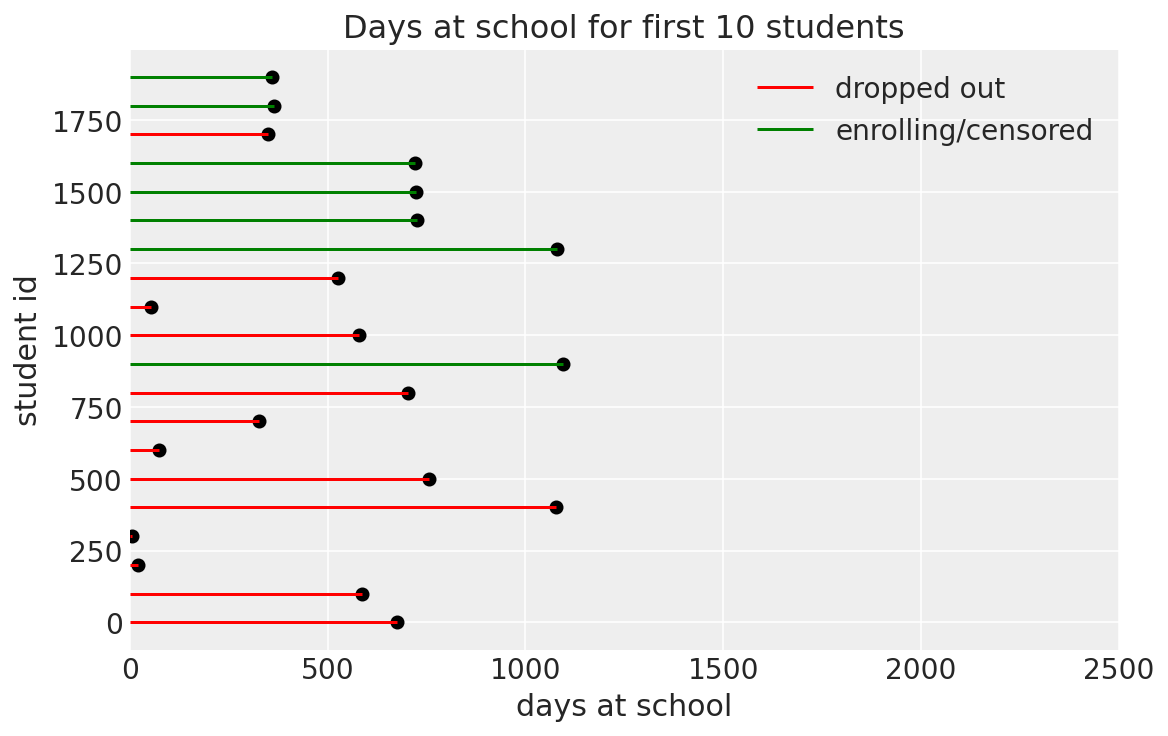

In [ ]:
## first limit df to 10
d=df.loc[(df.index.values[:2000:100])]
dropped=d['dropped']==1
enrolling=~dropped

fig,ax=plt.subplots(figsize=(8,5))

ax.hlines(d.loc[dropped].index.values,xmin=0,xmax=d.loc[dropped,'days_at_school'],color='r',label='dropped out')
ax.hlines(d.loc[enrolling].index.values,xmin=0,xmax=d.loc[enrolling,'days_at_school'],color='g',label='enrolling/censored')
ax.scatter(
    d.loc[:,'days_at_school'],
    d.index.values,
    c='k',
)

ax.set(title='Days at school for first 10 students',xlabel='days at school',ylabel='student id',xlim=(0,2500))
plt.legend()

8


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'rate'),
 (0.0, 30.0),
 Text(0.5, 0, 'days'),
 Text(0.5, 1.0, 'a~Normal()')]

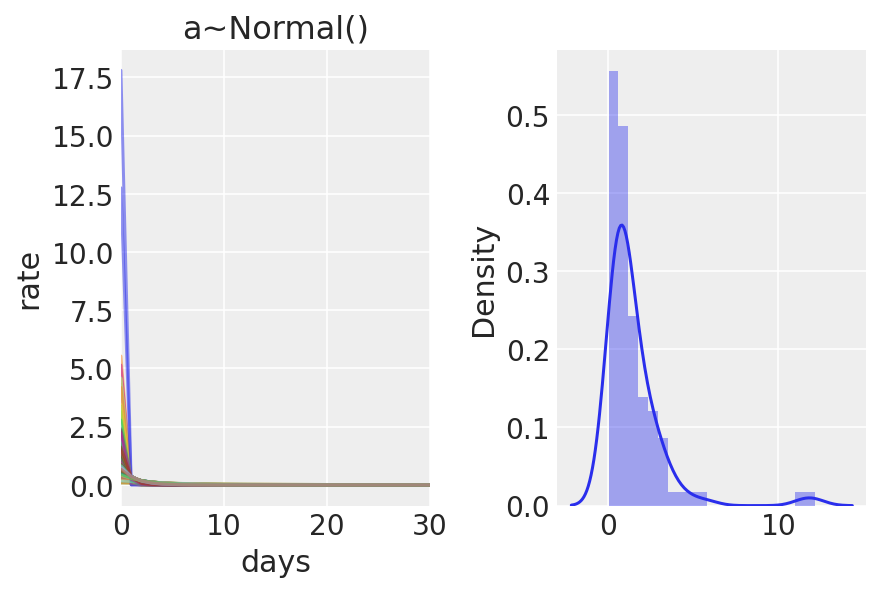

In [ ]:
fig,ax=plt.subplots(1,2)
a=stats.norm(0,1).rvs(100)  
mu=np.exp(a)
lams=1/mu
print((lams<0.25).sum())
eX=np.arange(0,100)
for lam in lams:
  eY=stats.expon.pdf(eX,loc=0,scale=lam)
  ax[0].plot(eX,eY,alpha=0.5)
sns.distplot(lams,ax=ax[1])
ax[0].set(xlim=(0,30),xlabel='days',ylabel='rate',title=f'a~Normal()')


Text(20, 0.8, 'probability of not-dropout\n before or at given day')

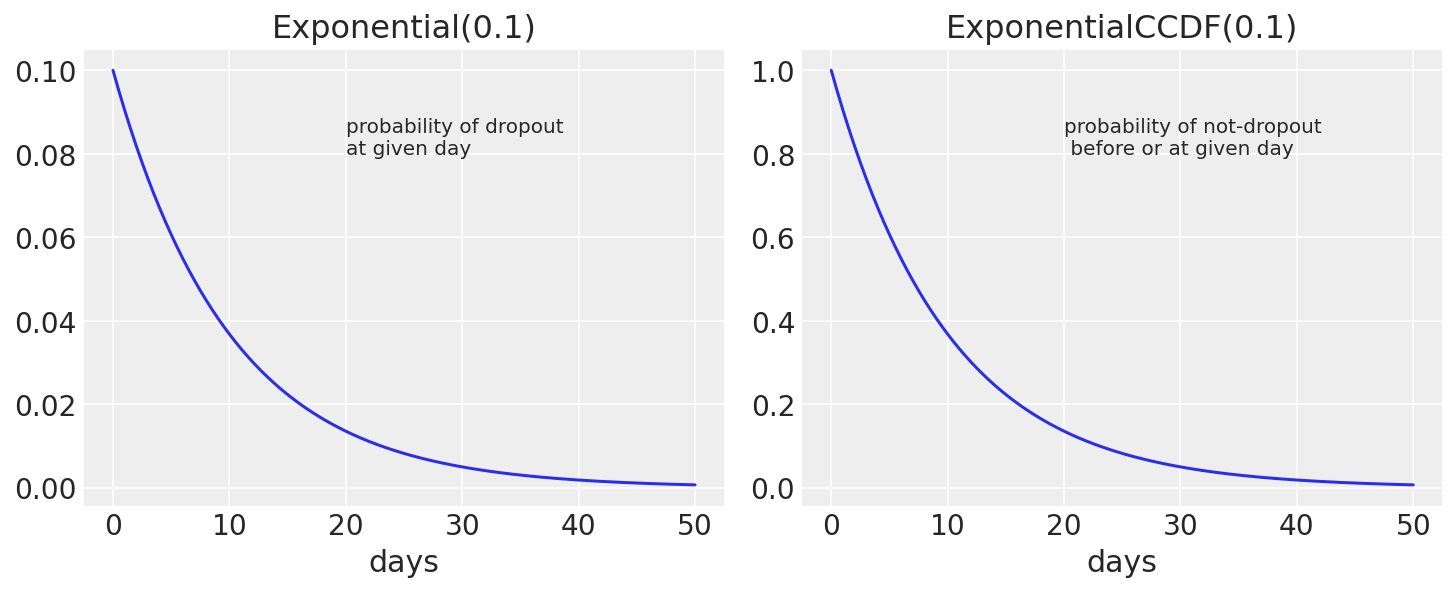

In [ ]:
fig,axs=plt.subplots(1,2,figsize=(10,4))
eX=np.linspace(0,50,300)
lam=0.1
axs[0].plot(eX,stats.expon.pdf(eX,loc=0,scale=1/lam))    ## Exponential 
axs[1].plot(eX,(1-stats.expon.cdf(eX,loc=0,scale=1/0.1))) ## ExponentialCCDF
axs[0].set(title='Exponential(0.1)',xlabel='days',)
axs[1].set(title='ExponentialCCDF(0.1)',xlabel='days')

axs[0].text(20,0.08,'probability of dropout \nat given day')
axs[1].text(20,0.8,'probability of not-dropout\n before or at given day')

In [ ]:
def expon_ccdf(lam,array):
  return (np.exp(-1*lam*array))

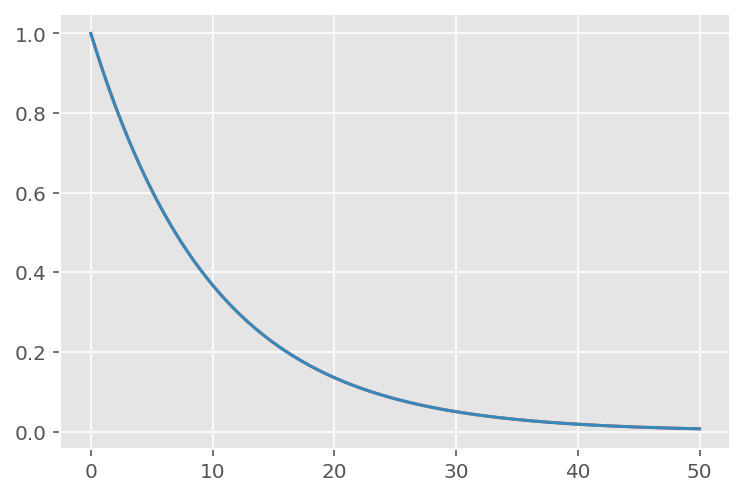

In [ ]:
plt.plot(eX,expon_ccdf(0.1,eX))
plt.plot(eX,(1-stats.expon.cdf(eX,loc=0,scale=1/0.1)))

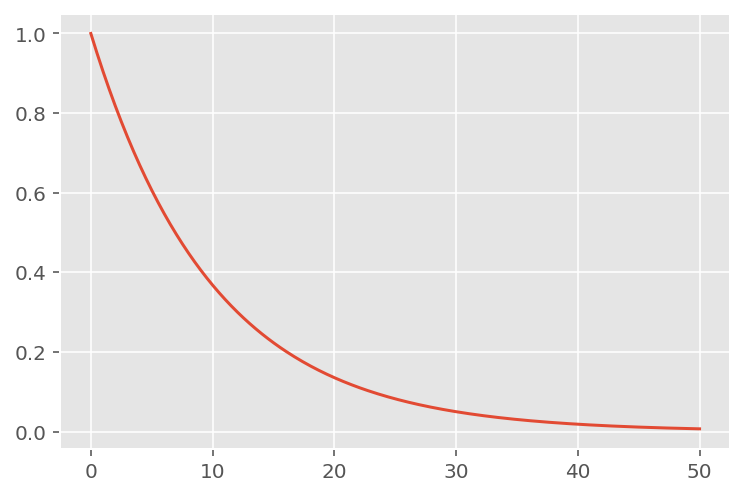

In [ ]:
plt.plot(eX,(1-stats.expon.cdf(eX,loc=0,scale=1/0.1)))

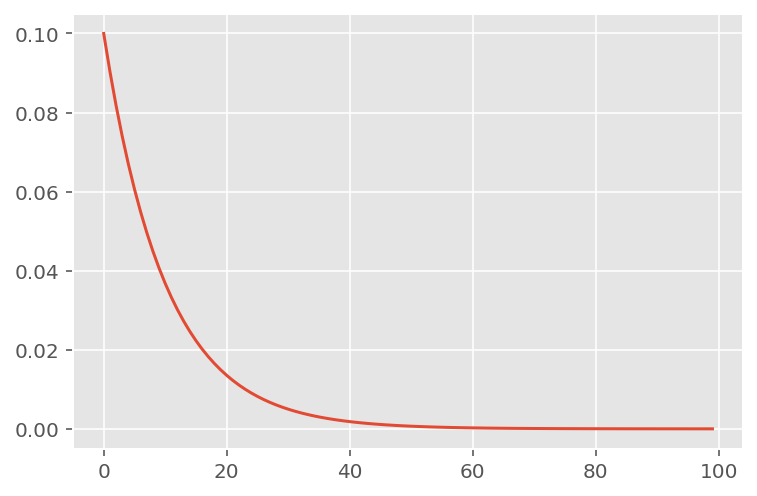

In [ ]:
plt.plot(eX,stats.expon.pdf(eX,loc=0,scale=1/0.1))

In [ ]:
## prior predective checks

def plot_priors(mu_prior,sd_prior,ax_0,ax_1):
  """
  plot priors for different values of a given
  mu and sd
  """

  if (ax_0==None) or (ax_1==None):
    fig,(ax_0,ax_1)=plt.subplots(2,1)

  a=stats.norm(mu_prior,sd_prior).rvs(100)
  b=stats.norm(mu_prior,sd_prior).rvs(100)
  mu=np.exp(a+b)
  lams=1/mu
  eX=np.arange(0,100)

  for lam in lams:
    eY=stats.expon.pdf(eX,loc=0,scale=1/lam)
    ax_0.plot(eX,eY)
  sns.distplot(lams,ax=ax_1)
  ax_0.set(xlim=(0,10),ylim=(0,0.25),xlabel='days',ylabel='rate ',title=f'a,b~Normal({mu_prior},{sd_prior})')
  ax_1.set(xlabel='rate',ylabel='density',title=f'a,b~Normal({mu_prior},{sd_prior})')

  


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

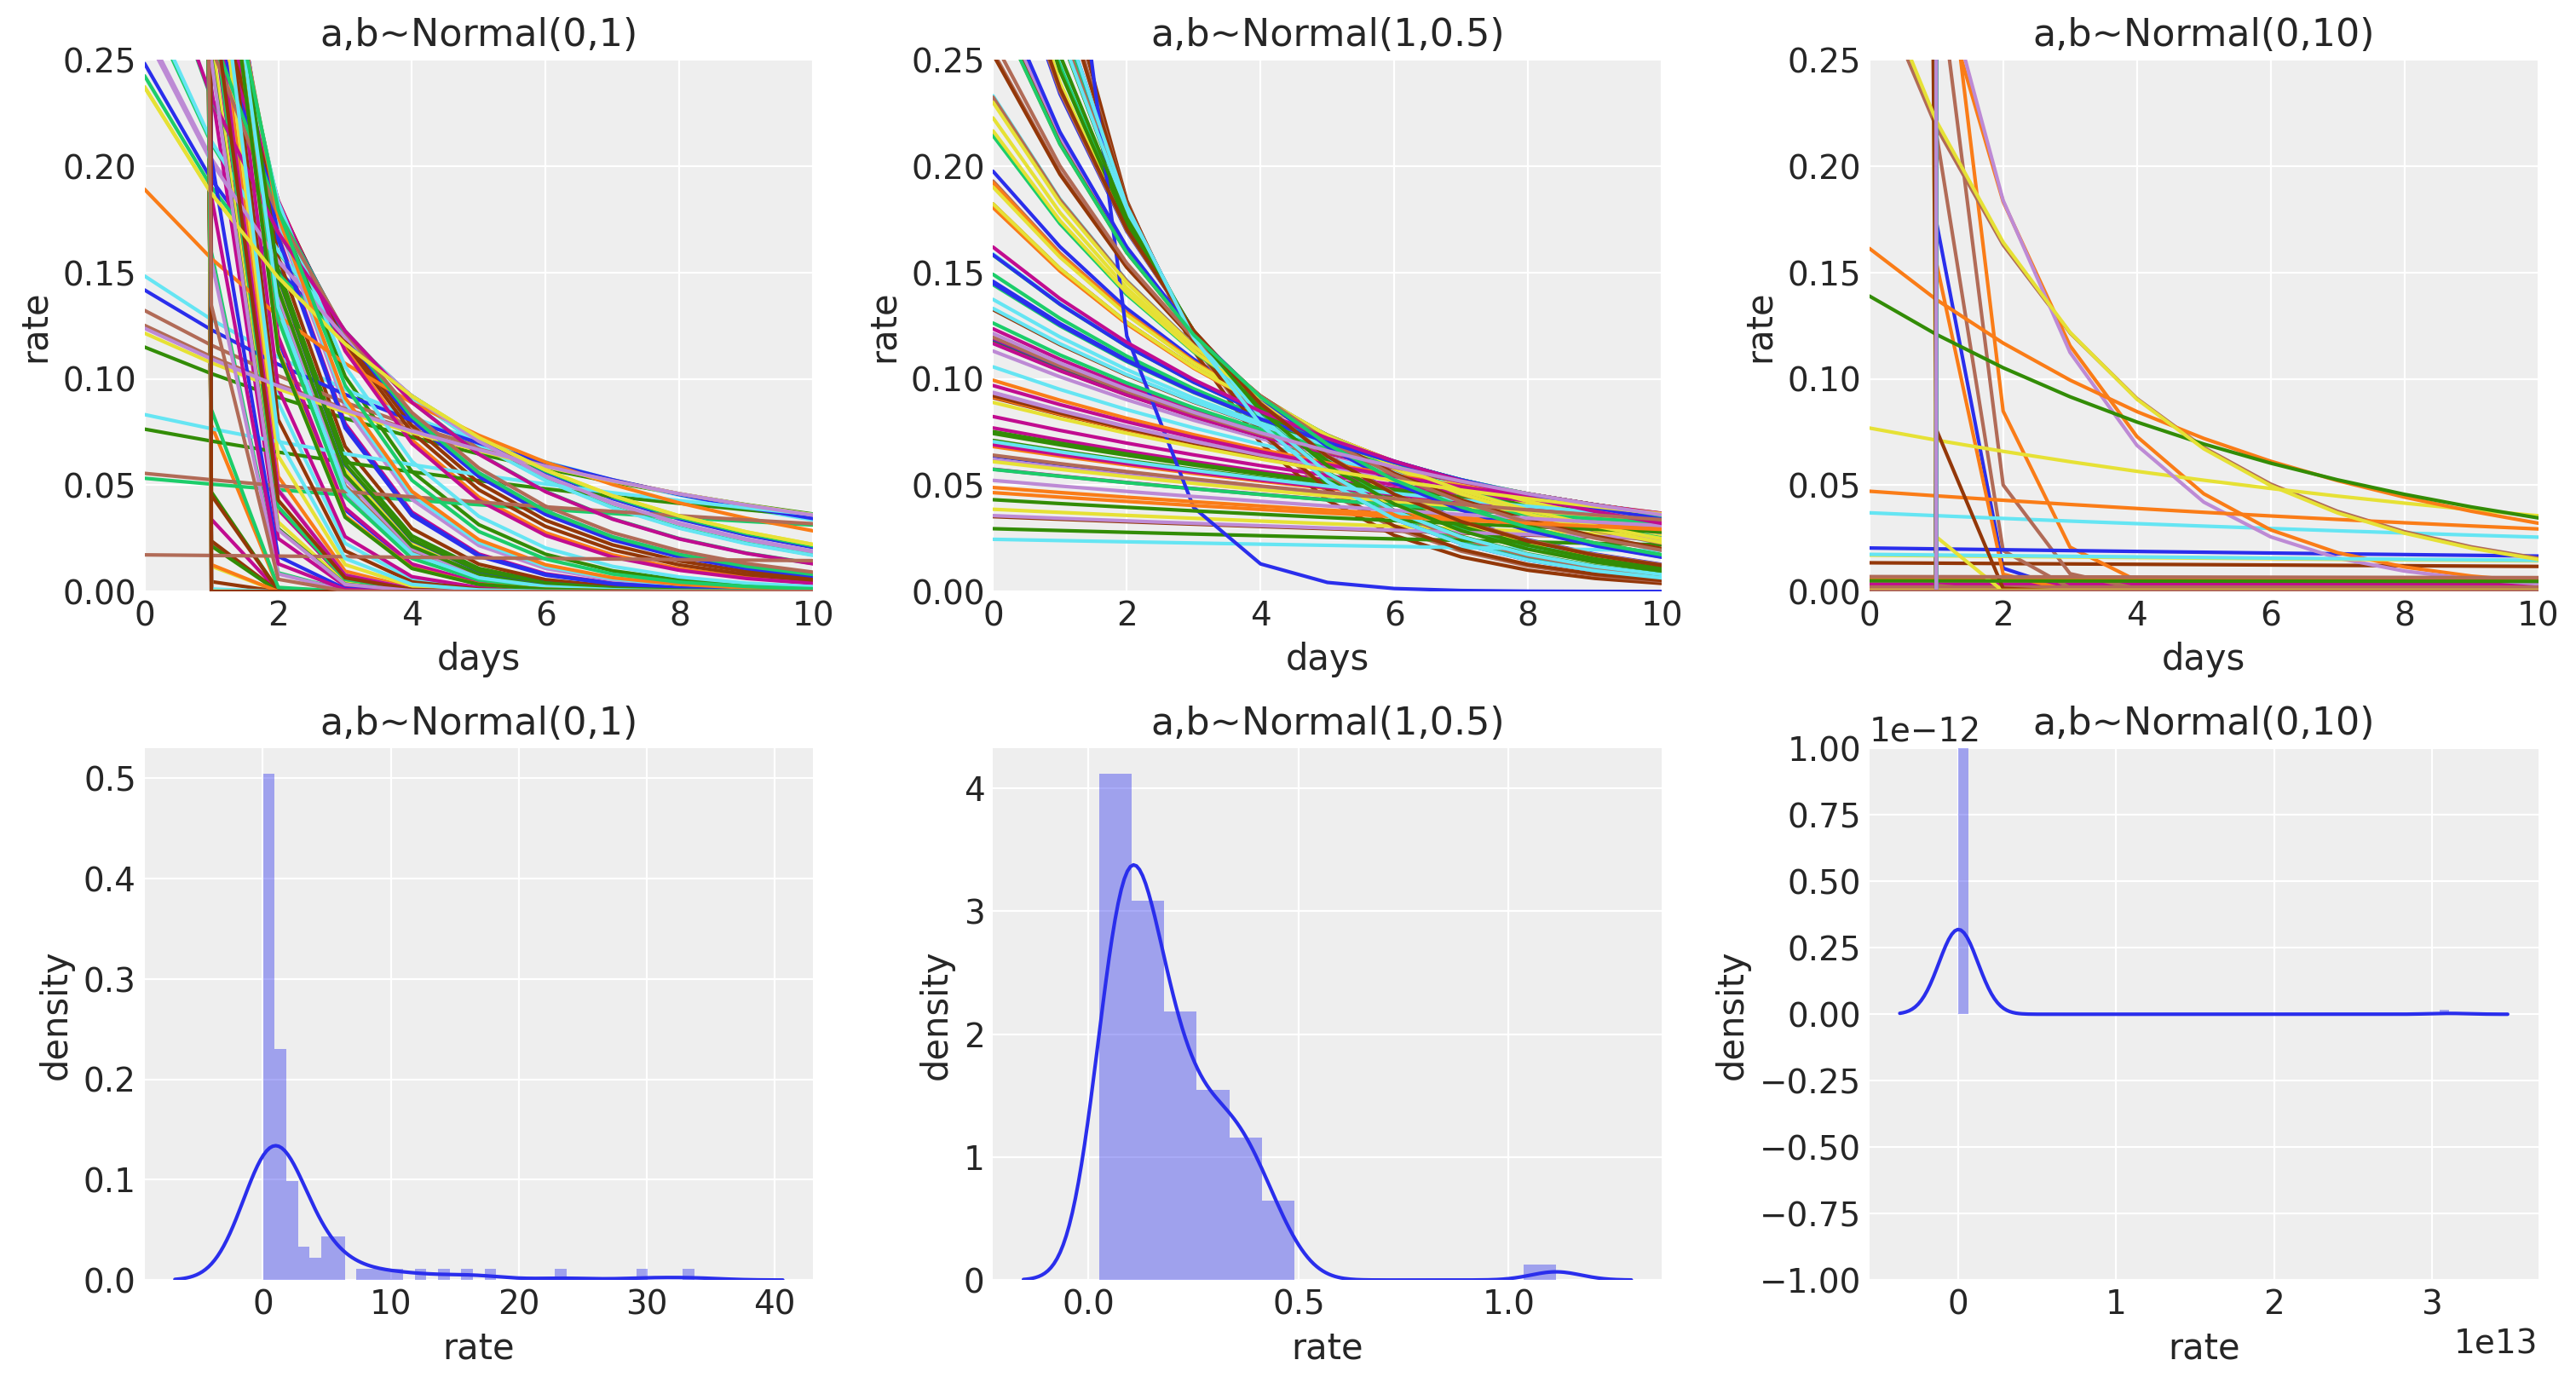

In [ ]:
fig,axs=plt.subplots(2,3,figsize=(15,8))

plot_priors(0,1,axs[0,0],axs[1,0])

plot_priors(1,0.5,axs[0,1],axs[1,1])

plot_priors(0,10,axs[0,2],axs[1,2])

In [ ]:
 stats.norm(0,2).rvs(100)>10

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [ ]:
np.exp(10)

22026.465794806718

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='days_at_school', ylabel='Density'>

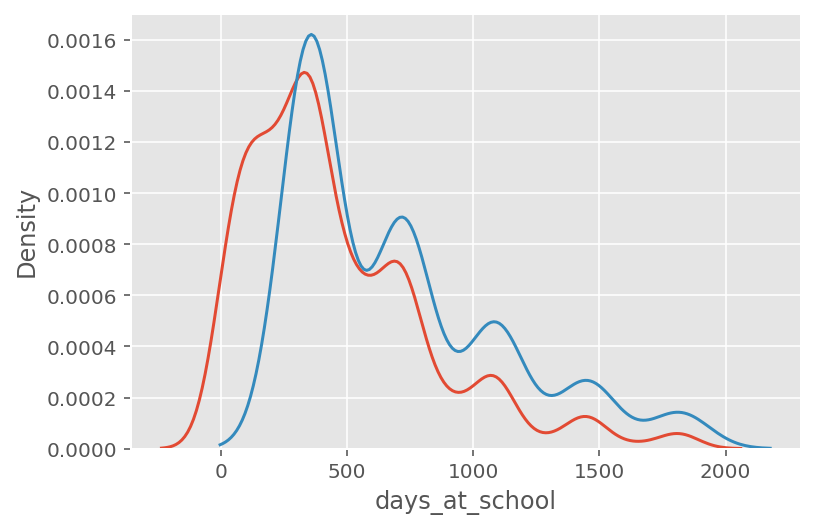

In [ ]:
sns.distplot(df['days_at_school'],hist=False)
sns.distplot(df.loc[df['dropped']==0,'days_at_school'],hist=False)


Let D be the days to event
$$D_{i}|dropout==1 \sim Exponential(\lambda_{i})$$
$$D_{i}|dropout==0 \sim Exponential-CCDF(\lambda_{i})$$
where,
$$\lambda_{i}= \alpha_{[far]}+  \beta_{bus} $$

In [ ]:
def likelihood(lam,obs_value,censored):
    return (censored*tt.log(lam) - lam * obs_value)

# with pm.Model() as m_2:
#   drop_out=pm.Data('drop_out',df['dropped'])
#   far=pm.Data('far',df['far'].astype('int'))
#   days_at_school=pm.Data('days_at_school',df['days_at_school'])
  
#   bus=pm.intX(pm.Data('bus',df['bus']))
#   a=pm.Normal('a',5,2,shape=2)
#   b=pm.Normal('b',0,2)
#   mu = pm.Deterministic('mu',pm.math.exp(a[far]+b*bus))
#   lam= pm.Deterministic('lam',1/mu)
#   drop_out_rate=pm.Potential('drop_out_rate',likelihood(lam=lam,obs_value=days_at_school,censored=drop_out))
#   trace_2=pm.sample()

with pm.Model() as m_1:
  drop_out=pm.Data('drop_out',df['dropped'])
  far=pm.Data('far',df['far'].astype('int'))
  days_at_school=pm.Data('days_at_school',df['days_at_school'])
  bus=pm.intX(pm.Data('bus',df['bus']))
  a=pm.Normal('a',2,0.5,shape=2)
  b=pm.Normal('b',2,0.5,shape=2)
  mu = pm.Deterministic('mu',pm.math.exp(a[far]+b[bus]))
  lam= pm.Deterministic('lam',1/mu)
  drop_out_rate=pm.Potential('drop_out_rate',likelihood(lam=lam,obs_value=days_at_school,censored=drop_out))
  trace_1=pm.sample(return_inferencedata=True,cores=2)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 25 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f78d102ddd0>,
      dtype=object)

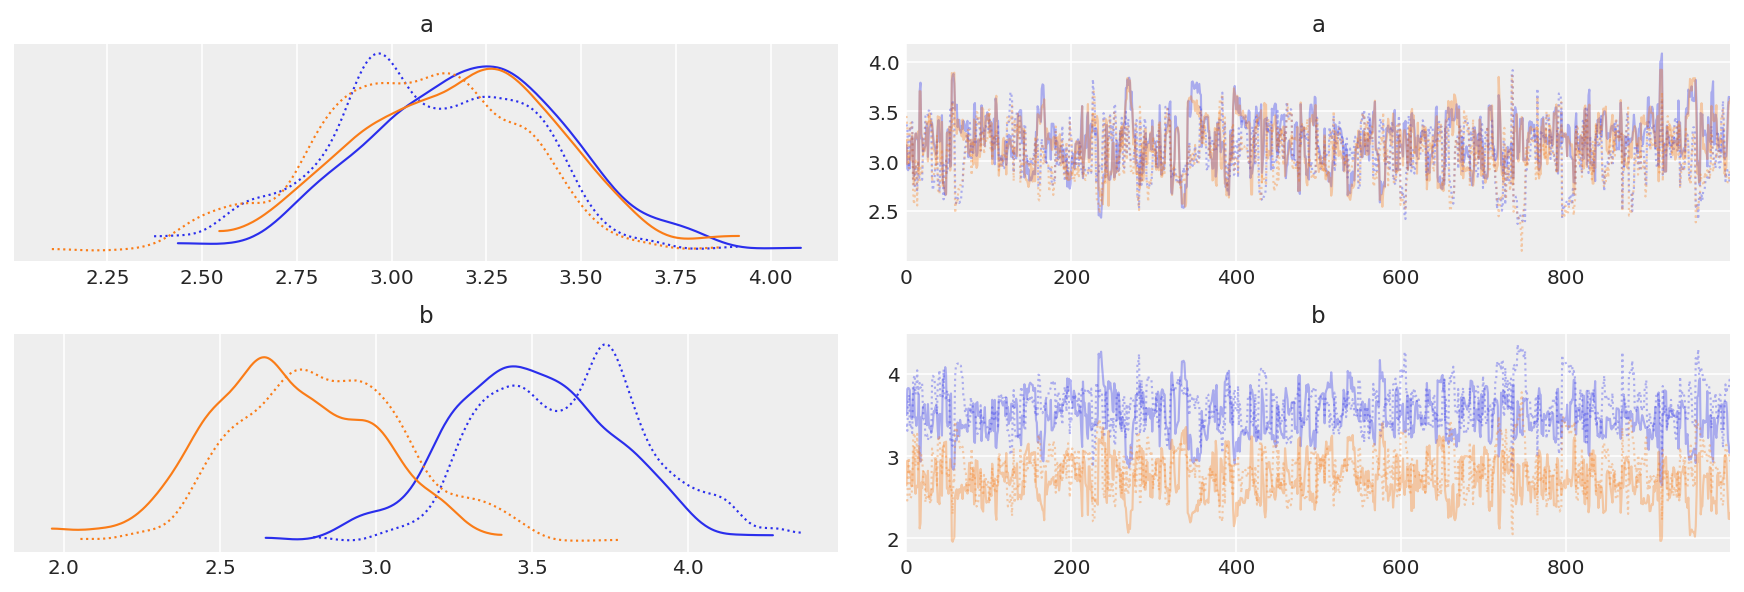

In [ ]:
az.plot_trace(trace_1,var_names=['~lam','~mu'])

In [ ]:
az.summary(trace_1,var_names=['~lam','~mu'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a[0],3.147,0.269,2.604,3.613,0.025,0.018,127.0,231.0,1.04
a[1],3.116,0.270,2.592,3.594,0.029,0.021,82.0,241.0,1.04
b[0],3.556,0.268,3.081,4.095,0.024,0.018,122.0,240.0,1.04
b[1],2.777,0.270,2.289,3.296,0.030,0.022,75.0,278.0,1.04


In [ ]:
az.summary(trace_1,var_names=['~lam','~mu'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a[0],3.172,0.269,2.635,3.613,0.02,0.014,187.0,173.0,1.02
a[1],3.122,0.271,2.605,3.596,0.02,0.015,185.0,180.0,1.02
b[0],3.478,0.270,3.030,4.009,0.02,0.014,191.0,147.0,1.02
b[1],2.736,0.273,2.258,3.278,0.02,0.014,185.0,181.0,1.02


In [ ]:
np.exp(trace_1.posterior.sel({'a_dim_0':0,'chain':0})['a'].data)

array([38.80046458, 40.35918785, 38.23287511, 40.0665097 , 43.59920905,
       45.05705347, 34.58932866, 37.86422489, 28.54333063, 28.10598087,
       29.95173479, 20.42996259, 14.6285572 , 14.18688027, 14.12705456,
        8.05741968,  8.04388736,  7.97341406,  9.00887281,  8.7036097 ,
        8.6708838 ,  8.73085547,  8.87246242,  9.8401671 , 10.22363708,
       18.67887805, 24.41957337, 25.45814467, 26.1017667 , 34.933129  ,
       17.90338478, 17.89649802, 18.11287652, 18.53054717, 17.42158797,
       17.32617627,  9.17535106,  9.95843448,  9.60465274, 10.45984414,
        9.29089282, 12.41484985, 35.1375583 , 11.65898512, 15.42508797,
       18.25133526, 15.92555601, 20.67660745, 25.81543862, 24.11888793,
       24.82041167, 23.79831719, 22.53018673, 13.78367617, 13.21623837,
       16.11440498, 15.60161653, 28.84500287, 28.13777968, 14.19714729,
       21.04259419, 31.59931327, 28.70766692, 45.63596356, 41.27154586,
       25.22570118, 96.067912  , 80.73694758, 82.30920051, 82.45

In [ ]:

az.summary(
  {'lam_a[0]':1/np.exp(trace_1.posterior.sel({'a_dim_0':0,'chain':0})['a'].data)},kind='stats'
)

,mean,sd,hdi_3%,hdi_97%
lam_a[0],0.051,0.027,0.018,0.108


In [ ]:
0.1-0.051

0.04900000000000001

In [ ]:

with m_1:
  pm.set_data({'far':np.array([1,1]),'bus':np.array([0,1])})
  posterior_1=pm.sample_posterior_predictive(trace_1,var_names=['mu'])

/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:1701: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  UserWarning,


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

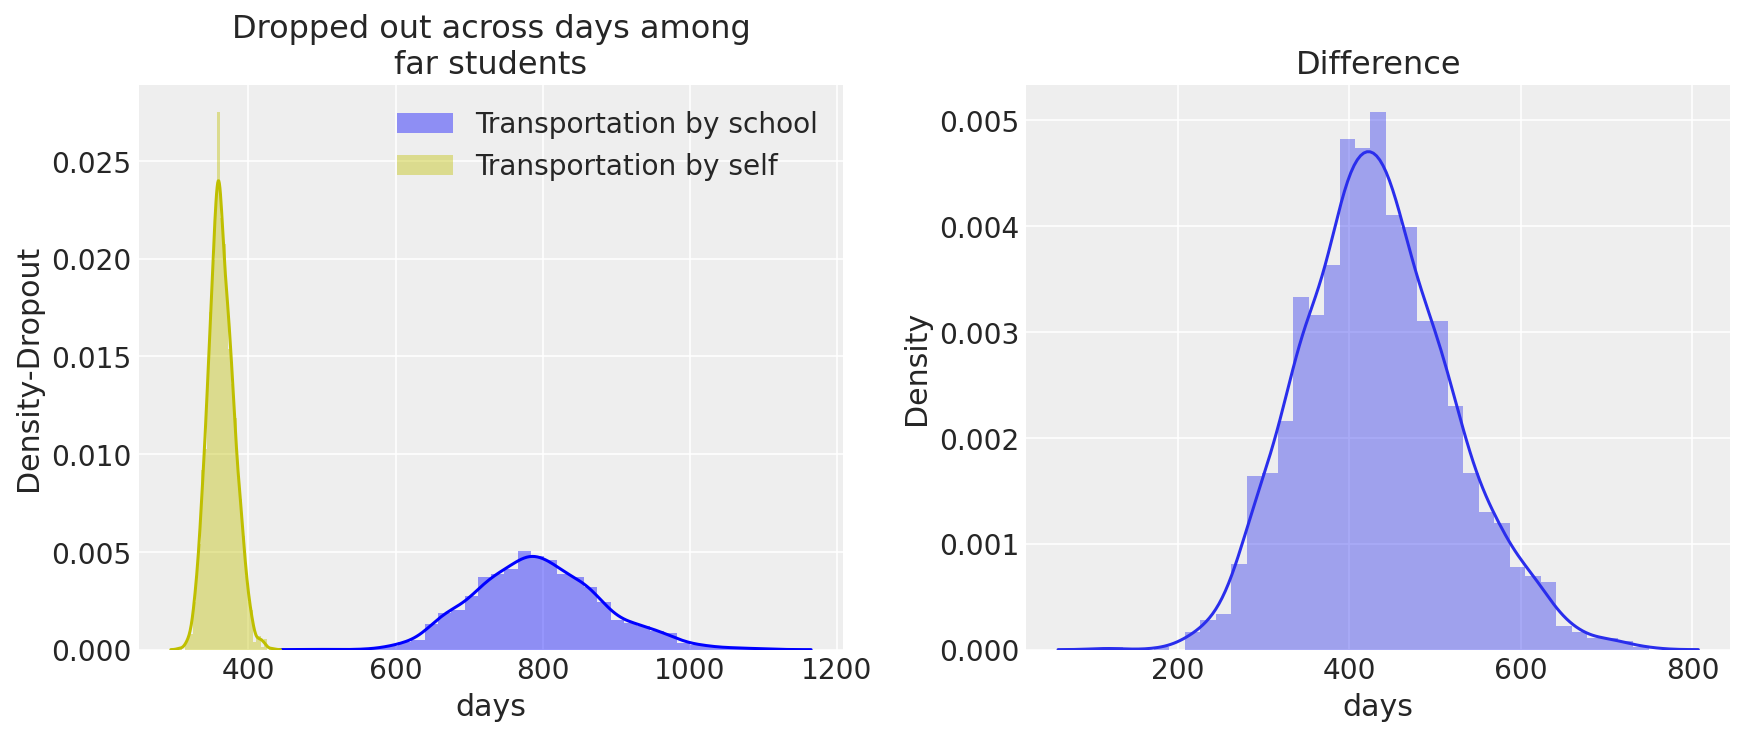

In [ ]:
fig,axs=plt.subplots(1,2,figsize=(12,5))
sns.distplot(posterior_1['mu'][:,0],color='b',ax=axs[0],label='Transportation by school')
sns.distplot(posterior_1['mu'][:,1],color='y',ax=axs[0],label='Transportation by self',)
sns.distplot(posterior_1['mu'][:,0]-posterior_1['mu'][:,1])
axs[0].set(title='Dropped out across days among\nfar students',xlabel='days',ylabel='Density-Dropout')
axs[1].set(title='Difference',xlabel='days',)
axs[0].legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


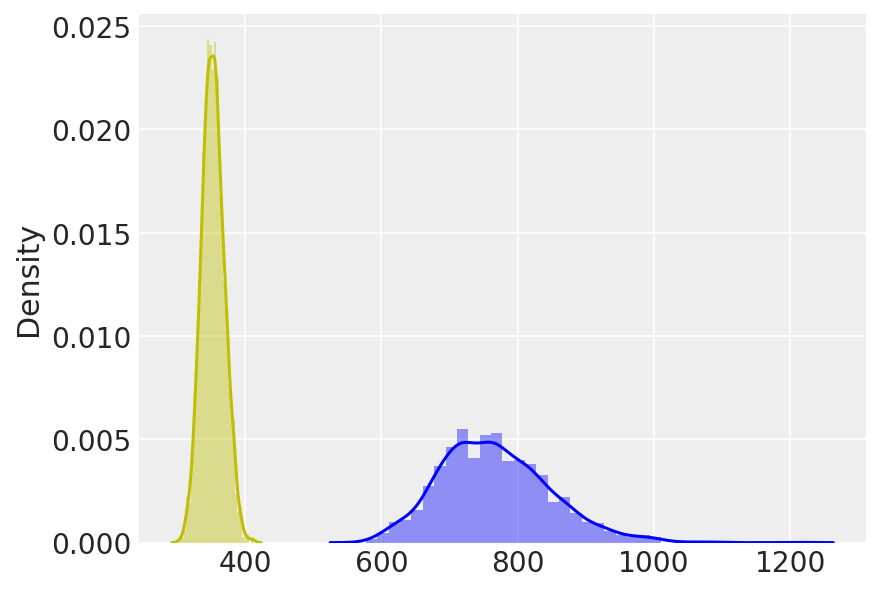

In [ ]:
sns.distplot(posterior_2['mu'][:,0],color='b')
sns.distplot(posterior_2['mu'][:,1],color='y')